In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob
import re
from collections import defaultdict

In [58]:
plt.style.use("science")
sns.set_theme(
    context="paper",
    style="darkgrid",
    palette="tab10",
    font="serif",
    # font_scale=3,
    color_codes=True,
    rc={"text.usetex": True},
)

In [59]:
data_dir = "../output/logistic/"

AND_results = glob(data_dir + "AND/*/*results.txt")
NAND_results = glob(data_dir + "NAND/*/*results.txt")
NOR_results = glob(data_dir + "NOR/*/*results.txt")
OR_results = glob(data_dir + "OR/*/*results.txt")
XOR_results = glob(data_dir + "XOR/*/*results.txt")
XNOR_results = glob(data_dir + "XNOR/*/*results.txt")

### Data manip

In [60]:
and_result_dict = defaultdict(list)

In [61]:
def extract_a_and_seed(file_path):
    match = re.search(r"a(\d+\.\d+)_seed(\d+)", file_path)
    if match:
        return float(match.group(1)), int(match.group(2))
    return None, None

In [62]:
for path in AND_results:
    a, seed = extract_a_and_seed(path)
    if a is not None:
        array = np.loadtxt(path, delimiter=",")
        and_result_dict[a].append(array)

In [63]:
average_AND_result = {
    key: np.nanmean(and_result_dict[key], axis=0) for key in and_result_dict
}
std_AND_result = {
    key: np.nanstd(and_result_dict[key], axis=0) for key in and_result_dict
}

In [64]:
average_AND_result[0.1], std_AND_result[0.1]

(array([[ 0.00000000e+00,  1.51639791e-01,  1.04249462e-02,
          2.87926918e-01],
        [ 1.00000000e+02,  1.57276206e-01, -1.39810001e-01,
          4.24268201e-01],
        [ 2.00000000e+02,  2.30947652e-01, -4.30976343e-01,
          5.73907931e-01],
        [ 3.00000000e+02,  3.91506888e-01, -7.69466507e-01,
          5.23230256e-01],
        [ 4.00000000e+02,  5.56801805e-01, -1.09712956e+00,
          2.67584462e-01],
        [ 5.00000000e+02,  7.18813986e-01, -1.41915925e+00,
         -8.38661045e-02],
        [ 6.00000000e+02,  8.62200487e-01, -1.72158072e+00,
         -4.56931083e-01],
        [ 7.00000000e+02,  9.85627449e-01, -2.01245937e+00,
         -8.24755317e-01],
        [ 8.00000000e+02,  1.10158651e+00, -2.30947685e+00,
         -1.18173934e+00],
        [ 9.00000000e+02,  1.21873019e+00, -2.61907988e+00,
         -1.52614630e+00],
        [ 1.00000000e+03,  1.33921716e+00, -2.93685436e+00,
         -1.85576632e+00],
        [ 1.10000000e+03,  1.46159618e+00, 

In [65]:
a_list = list(average_AND_result.keys())
a_list.sort()
final_mean_result = np.array([average_AND_result[a][-1] for a in a_list])
final_std_result = np.array([std_AND_result[a][-1] for a in a_list])

In [66]:
# epoch, chao_gate.DELTA, chao_gate.X0, chao_gate.X_THRESHOLD

Text(0.5, 0.98, 'AND gate')

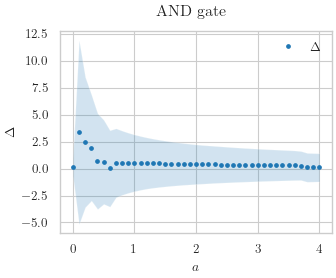

In [67]:
plt.plot(a_list, final_mean_result[:, 1], ".", label="$\\Delta$")
# add configence interval
plt.fill_between(
    a_list,
    final_mean_result[:, 1] - final_std_result[:, 1],
    final_mean_result[:, 1] + final_std_result[:, 1],
    alpha=0.2,
)
plt.legend()
plt.xlabel("$a$")
plt.ylabel("$\\Delta$")
plt.suptitle("AND gate")

Text(0.5, 0.98, 'AND gate')

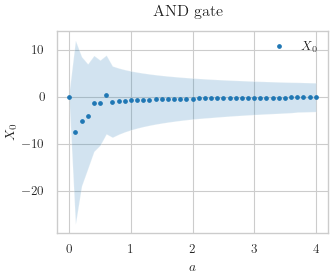

In [68]:
plt.plot(a_list, final_mean_result[:, 2], ".", label="$X_0$")
plt.fill_between(
    a_list,
    final_mean_result[:, 2] - final_std_result[:, 2],
    final_mean_result[:, 2] + final_std_result[:, 2],
    alpha=0.2,
)
plt.legend()
plt.xlabel("$a$")
plt.ylabel("$X_0$")
plt.suptitle("AND gate")

Text(0.5, 0.98, 'AND gate')

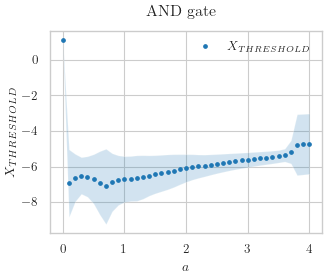

In [69]:
plt.plot(a_list, final_mean_result[:, 3], ".", label="$X_{THRESHOLD}$")
plt.fill_between(
    a_list,
    final_mean_result[:, 3] - final_std_result[:, 3],
    final_mean_result[:, 3] + final_std_result[:, 3],
    alpha=0.2,
)
plt.legend()
plt.xlabel("$a$")
plt.ylabel("$X_{THRESHOLD}$")
plt.suptitle("AND gate")

### All gates

In [70]:
# Initialize dictionaries for each gate
nand_result_dict = defaultdict(list)
nor_result_dict = defaultdict(list)
or_result_dict = defaultdict(list)
xor_result_dict = defaultdict(list)
xnor_result_dict = defaultdict(list)


# Function to process results for a given gate
def process_results(results, result_dict):
    for path in results:
        a, seed = extract_a_and_seed(path)
        if a is not None:
            array = np.loadtxt(path, delimiter=",")
            result_dict[a].append(array)


# Process results for each gate
process_results(NAND_results, nand_result_dict)
process_results(NOR_results, nor_result_dict)
process_results(OR_results, or_result_dict)
process_results(XOR_results, xor_result_dict)
process_results(XNOR_results, xnor_result_dict)

# Calculate average and standard deviation for each gate
average_NAND_result = {
    key: np.nanmean(nand_result_dict[key], axis=0) for key in nand_result_dict
}
std_NAND_result = {
    key: np.nanstd(nand_result_dict[key], axis=0) for key in nand_result_dict
}

average_NOR_result = {
    key: np.nanmean(nor_result_dict[key], axis=0) for key in nor_result_dict
}
std_NOR_result = {key: np.std(nor_result_dict[key], axis=0) for key in nor_result_dict}

average_OR_result = {
    key: np.nanmean(or_result_dict[key], axis=0) for key in or_result_dict
}
std_OR_result = {key: np.nanstd(or_result_dict[key], axis=0) for key in or_result_dict}

average_XOR_result = {
    key: np.nanmean(xor_result_dict[key], axis=0) for key in xor_result_dict
}
std_XOR_result = {
    key: np.nanstd(xor_result_dict[key], axis=0) for key in xor_result_dict
}

average_XNOR_result = {
    key: np.nanmean(xnor_result_dict[key], axis=0) for key in xnor_result_dict
}
std_XNOR_result = {
    key: np.nanstd(xnor_result_dict[key], axis=0) for key in xnor_result_dict
}

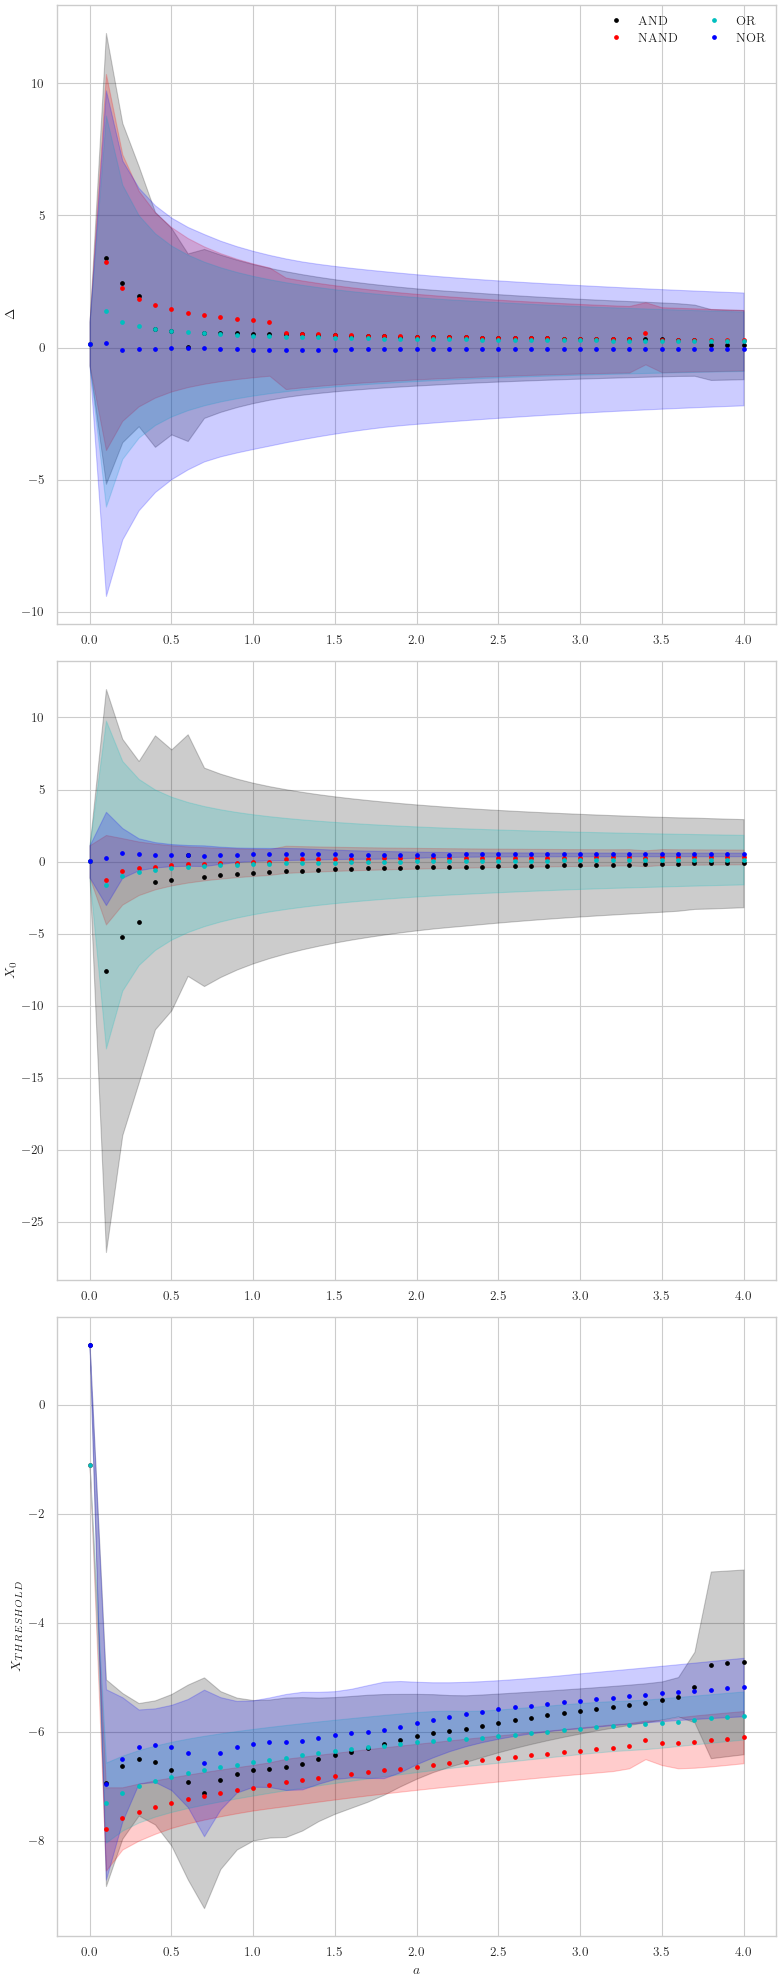

In [71]:
# Plot final metrics for all gates
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 20))

# Create a secondary y-axis


# AND gate
ax[0].plot(a_list, [average_AND_result[a][-1][1] for a in a_list], "k.", label="AND")
ax[0].fill_between(
    a_list,
    [average_AND_result[a][-1][1] - std_AND_result[a][-1][1] for a in a_list],
    [average_AND_result[a][-1][1] + std_AND_result[a][-1][1] for a in a_list],
    color="k",
    alpha=0.2,
)

ax[1].plot(a_list, [average_AND_result[a][-1][2] for a in a_list], "k.", label="AND")
ax[1].fill_between(
    a_list,
    [average_AND_result[a][-1][2] - std_AND_result[a][-1][2] for a in a_list],
    [average_AND_result[a][-1][2] + std_AND_result[a][-1][2] for a in a_list],
    color="k",
    alpha=0.2,
)

ax[2].plot(a_list, [average_AND_result[a][-1][3] for a in a_list], "k.", label="AND")
ax[2].fill_between(
    a_list,
    [average_AND_result[a][-1][3] - std_AND_result[a][-1][3] for a in a_list],
    [average_AND_result[a][-1][3] + std_AND_result[a][-1][3] for a in a_list],
    color="k",
    alpha=0.2,
)

# NAND gate
ax[0].plot(a_list, [average_NAND_result[a][-1][1] for a in a_list], "r.", label="NAND")
ax[0].fill_between(
    a_list,
    [average_NAND_result[a][-1][1] - std_NAND_result[a][-1][1] for a in a_list],
    [average_NAND_result[a][-1][1] + std_NAND_result[a][-1][1] for a in a_list],
    color="r",
    alpha=0.2,
)

ax[1].plot(a_list, [average_NAND_result[a][-1][2] for a in a_list], "r.", label="NAND")
ax[1].fill_between(
    a_list,
    [average_NAND_result[a][-1][2] - std_NAND_result[a][-1][2] for a in a_list],
    [average_NAND_result[a][-1][2] + std_NAND_result[a][-1][2] for a in a_list],
    color="r",
    alpha=0.2,
)

ax[2].plot(a_list, [average_NAND_result[a][-1][3] for a in a_list], "r.", label="NAND")
ax[2].fill_between(
    a_list,
    [average_NAND_result[a][-1][3] - std_NAND_result[a][-1][3] for a in a_list],
    [average_NAND_result[a][-1][3] + std_NAND_result[a][-1][3] for a in a_list],
    color="r",
    alpha=0.2,
)

# OR gate
ax[0].plot(a_list, [average_OR_result[a][-1][1] for a in a_list], "c.", label="OR")
ax[0].fill_between(
    a_list,
    [average_OR_result[a][-1][1] - std_OR_result[a][-1][1] for a in a_list],
    [average_OR_result[a][-1][1] + std_OR_result[a][-1][1] for a in a_list],
    color="c",
    alpha=0.2,
)

ax[1].plot(a_list, [average_OR_result[a][-1][2] for a in a_list], "c.", label="OR")
ax[1].fill_between(
    a_list,
    [average_OR_result[a][-1][2] - std_OR_result[a][-1][2] for a in a_list],
    [average_OR_result[a][-1][2] + std_OR_result[a][-1][2] for a in a_list],
    color="c",
    alpha=0.2,
)

ax[2].plot(a_list, [average_OR_result[a][-1][3] for a in a_list], "c.", label="OR")
ax[2].fill_between(
    a_list,
    [average_OR_result[a][-1][3] - std_OR_result[a][-1][3] for a in a_list],
    [average_OR_result[a][-1][3] + std_OR_result[a][-1][3] for a in a_list],
    color="c",
    alpha=0.2,
)

# NOR gate
ax[0].plot(a_list, [average_NOR_result[a][-1][1] for a in a_list], "b.", label="NOR")
ax[0].fill_between(
    a_list,
    [average_NOR_result[a][-1][1] - std_NOR_result[a][-1][1] for a in a_list],
    [average_NOR_result[a][-1][1] + std_NOR_result[a][-1][1] for a in a_list],
    color="b",
    alpha=0.2,
)

ax[1].plot(a_list, [average_NOR_result[a][-1][2] for a in a_list], "b.", label="NOR")
ax[1].fill_between(
    a_list,
    [average_NOR_result[a][-1][2] - std_NOR_result[a][-1][2] for a in a_list],
    [average_NOR_result[a][-1][2] + std_NOR_result[a][-1][2] for a in a_list],
    color="b",
    alpha=0.2,
)

ax[2].plot(a_list, [average_NOR_result[a][-1][3] for a in a_list], "b.", label="NOR")
ax[2].fill_between(
    a_list,
    [average_NOR_result[a][-1][3] - std_NOR_result[a][-1][3] for a in a_list],
    [average_NOR_result[a][-1][3] + std_NOR_result[a][-1][3] for a in a_list],
    color="b",
    alpha=0.2,
)

ax[0].set_ylabel("$\\Delta$")
ax[1].set_ylabel("$X_0$")
ax[2].set_ylabel("$X_{THRESHOLD}$")
ax[2].set_xlabel("$a$")
ax[0].legend(loc="upper right", ncols=2)

plt.tight_layout()